# Assignment 2 - Classification of Business Reviews

Ariana Rozsnyoi 44616732

The following code reads business reviews which are part of the [Yelp Dataset stored in Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset). The data are stored in a CSV file. The following code reads the CSV file and prints the contents of the first 5 records:

In [1]:
import pandas as pd
pd_data = pd.read_csv('yelp_review.csv')
pd_data[:5]

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


From the data, we will only use the reviews and the star rating. The following code extracts this information and places it in a list of pairs:

In [2]:
all_data = list(zip(pd_data['text'], pd_data['stars']))

In [3]:
len(all_data)

5261668

In [4]:
all_data[:5]

[("Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly.",
  5),
 ("Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \n\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \n\nA bit outside of downtown montreal but take the metro out and it's less than a 10 minute walk from the station.",
  5),
 ("Lester's is located in a beautiful neighborhood and has been there since 1951. They are known for smoked meat which most deli's have but their brisket sandwich is what I come to montreal for. They've got about 12 seats outside to go along with the insi

Let's now check the distribution of star ratings:

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

In [6]:
from collections import Counter
c = Counter([rating for text, rating in all_data])
c

Counter({1: 731363, 2: 438161, 3: 615481, 4: 1223316, 5: 2253347})

<Container object of 5 artists>

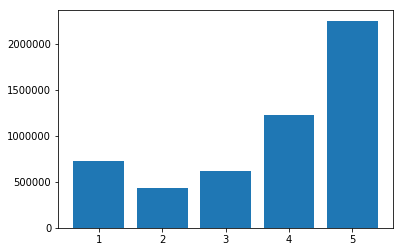

In [7]:
plt.bar(range(1,6), [c[1], c[2], c[3], c[4], c[5]])

**In this assignment you will predict whether a particular review gives 5 stars or not.**

The data set is fairly large with more than 5 million samples. To speed up the computations for this assigmnent, we will use 500,000 samples for training,  10,000 for the dev-test set and 10,000 for the test set. To reduce any possible bias while partitioning the data set, we will first shuffle the data and then partition into training data, dev-test data, and test data using the following code:

In [42]:
import random
random.seed(1234)
random.shuffle(all_data)
train_data, devtest_data, test_data = all_data[:500000], all_data[500000:510000], all_data[510000:520000]


## Exercise 1 (1 mark)
The data are annotated with a star rating. In this assignment we will attempt to predict whether the review has 5 stars or not. In other words, we will use two categories: "it does not have 5 stars", and "it has 5 stars". According to these categories, check that the training data, devtest data and test data have the same proportions of the categories "it does not have 5 stars", and "it has 5 stars".

In [9]:
import collections

print("Training Set")
fivestar1 = [s for s in train_data if s[1] ==5]
fivecounter1 = collections.Counter(s[1] for s in fivestar1)

notfive1= [s for s in train_data if s[1] != 5]
counter1= collections.Counter(s[1] for s in notfive1)


num1= sum(fivecounter1.values())
num2= sum(counter1.values())

print("it has 5 stars: ", num1)
print("it does not have 5 stars: ", num2)

print('Proportion: ', '{0:.2f}%'.format((num1 / num2 * 100)))

print()

print("Devtest set")
fivestar2= [s for s in devtest_data if s[1] ==5]
fivecounter2= collections.Counter(s[1] for s in fivestar2)

notfive2= [s for s in devtest_data if s[1] != 5]
counter2= collections.Counter(s[1] for s in notfive2)

num3= sum(fivecounter2.values())
num4= sum(counter2.values())

print("it has 5 stars: ", num3)
print("it does not have 5 stars: ", num4)

print('Proportion: ', '{0:.2f}%'.format((num3 / num4 * 100)))


print()

print("Test set")
fivestar3 = [s for s in test_data if s[1] ==5]
fivecounter3= collections.Counter(s[1] for s in fivestar3)

notfive3= [s for s in test_data if s[1] != 5]
counter3= collections.Counter(s[1] for s in notfive3)

num5= sum(fivecounter3.values())
num6= sum(counter3.values())

print("it has 5 stars: ", num5)
print("it does not have 5 stars: ", num6)

print('Proportion: ', '{0:.2f}%'.format((num5/ num6 * 100)))




Training Set
it has 5 stars:  214205
it does not have 5 stars:  285795
Proportion:  74.95%

Devtest set
it has 5 stars:  4275
it does not have 5 stars:  5725
Proportion:  74.67%

Test set
it has 5 stars:  4324
it does not have 5 stars:  5676
Proportion:  76.18%


## Exercise 2 (2 marks)
Use sklearn to generate the tf.idf matrix of the training set. With this matrix, train an sklearn Naive Bayes classifier using the training set and report the F1 scores of the training set, the devtest set, and the set set.

In [74]:
def data_categories(text):
    "Split data into two classes"
    data = [(t,s) for (t,s) in text]
    result = []
    
    for t,s in data:
        if s==5:
            result.append((t,1))
        else:
            result.append((t,0))
    return result


train_d = data_categories(train_data)
devtest_d= data_categories(devtest_data)
test_d = data_categories(test_data)

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(input='contents', stop_words='english', max_features=2000)
tfidf = TfidfVectorizer(lowercase=True)

tfidf_train = tfidf.fit_transform([x for x, y in train_d])
tfidf_devtest = tfidf.transform([x for x, y in devtest_d])
tfidf_test = tfidf.transform([x for x, y in test_d])

In [12]:
from sklearn.naive_bayes import MultinomialNB
sklearn_tfidfclassifier = MultinomialNB()
sklearn_tfidfclassifier.fit(tfidf_train, [y for x, y in train_d])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
from sklearn.metrics import f1_score  

print("f1 score of training set: ", f1_score([y for x, y in train_d], sklearn_tfidfclassifier.predict(tfidf_train)))
print("f1 score of devtest set: ",f1_score([y for x, y in devtest_d], sklearn_tfidfclassifier.predict(tfidf_devtest)))
print("f1 score of test set: ",f1_score([y for x, y in test_d], sklearn_tfidfclassifier.predict(tfidf_test)))


f1 score of training set:  0.7295114545508621
f1 score of devtest set:  0.6990077177508269
f1 score of test set:  0.7070789259560618


In [32]:
from sklearn.metrics import accuracy_score 
print("Accuracy score devtest set ", accuracy_score([y for x, y in devtest_d], sklearn_tfidfclassifier.predict(tfidf_devtest)))

Accuracy score devtest set  0.7816


# Exercise 3 (2 marks)
Logistic regression normally produces better results than Naive Bayes but it takes longer time to train. Look at the [documentation of sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and train a logistic regression classifier using the same tfidf information as in exercise 2. Report the F1 scores of the training set, the devtest set, and the test set.

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logisticregression = LogisticRegression()

logistic_regression_train= logisticregression.fit(tfidf_train, [y for x, y in train_d])

In [78]:

print("f1 score of training set: ", f1_score([y for x, y in train_d], logistic_regression_train.predict(tfidf_train)))
print("f1 score of devtest set: ",f1_score([y for x, y in devtest_d], logistic_regression_train.predict(tfidf_devtest)))
print("f1 score of test set: ",f1_score([y for x, y in test_d], logistic_regression_train.predict(tfidf_test)))


f1 score of training set:  0.823389634728492
f1 score of devtest set:  0.8146677566273502
f1 score of test set:  0.807311320754717


In [79]:
print("Accuracy score devtest set: ", accuracy_score([y for x, y in train_d], logisticregression.predict(tfidf_train)))


Accuracy score devtest set:  0.850162


# Exercise 4 (4 marks)
Given the results obtained in the previous exercises, answer the following questions. You must justify all answers.

#### 1. (1 mark) How much overfitting did you observe in the classifiers? 

  I did not observe overfitting in the classifiers as there is not a big difference in the F1 score outputs.


#### 2. (1 mark) What would you do to reduce overfitting? 
   The test set and the training set results are only slighty different, so there is no need to reduce overfitting. From the given results it appears the model is not overfitting.
    
    
    
#### 3. (1 mark) Which classifier is better? 
 The Logistic regression classifier is better than the Naive Bayes classifier as expected. It produces better F1 scores for the data sets.
    
#### 4. (1 mark) What can you conclude from the differences in the results between the dev-test set and the test set? 
 There is only a slight difference in the results. This can be attributed to the size of the training data.

## Exercise 5 (2 marks)
Write code that counts the false positives and false negatives of the training set of each classifier. What can you conclude from such counts?

In [18]:
tfidf_classifier = sklearn_tfidfclassifier.predict(tfidf_train)

logistic_classifier = logisticregression.predict(tfidf_train)

In [19]:
def false_positives(result, category): 
    "Return non-5 star reviews that were marked as 5 star"
    
    return collections.Counter([category[i] for i in range(len(result)) if result[i] == 1 and 
           category[i] != 1])
    
def false_negatives(result, category):
    "Return 5 star reviews that were not marked as 5 star"
    
    return collections.Counter([result[i] for i in range(len(result)) if result[i] != 1 
            and category[i] == 1])
    

In [20]:
false_positives([s for t,s in train_d], tfidf_classifier)

Counter({0: 79299})

In [21]:
false_negatives([s for t,s in train_d], tfidf_classifier)

Counter({0: 20742})

In [22]:
false_positives([s for t,s in train_d], logistic_classifier)

Counter({0: 39162})

In [23]:
false_negatives([s for t,s in train_d], logistic_classifier)

Counter({0: 35875})

From these counts we can deduce that the false positives on the tfidf classifier are much higher than the logistic regression classifier, indiciating the Logistic Regression classifier is doing a better job at prediciting reviews correctly.

## Exercise 6 (9 marks) - Improve the System and Final Analysis
This exercise is open ended. Your goal is to perform a more detailed error analysis and identify ways to improve the classification of reviews **by adding or changing the features**. To obtain top marks in this part, your answer must address all of the following topics:

1. An error analysis of the previous systems.
2. Based on the error analysis, explain what sort of modifications you would want to implement, and justify why these would be useful modifications.
3. Implementation of the improved classifier.
4. Evaluation of the results and comparison with the previous classifiers. What system is best and why?
5. Explain what further changes would possibly improve the classifier and why.

** Note that, even if the new system might not obtain better results than the previous systems, you can obtain top marks if you perform a good error analysis of the initial systems and the final system and you give a sensible justification of the decisions that led you to implement the new system. Similarly, you may not obtain top marks if you present a system that improves on the results but you do not provide a good error analysis or you do not justify your choice of new system. **

### 1. Error Analysis

In order to analyse the errors of the previous systems we can look at the classification report and the Confusion Matrix. This will display the classification errors of our classifiers so we can further improve the system. As we are only classifying into two classes the two main errors are false positive and false negative. Generating the Confusion Matrix for each classifier we can visualize the difference in misclassification errors. The sklearn MultinomialNB classifier wrongly predicts 545 times more than the logisitc classifier. However, there are still many classification errors in both classifiers. These classification errors can be attributed to the types of words and language used in the reviews, making it difficult to differentiate between a 4 and a 5 star review.


In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

print("tfidf report ")
print(classification_report([y for x, y in devtest_d], sklearn_tfidfclassifier.predict(tfidf_devtest)))
print("Confusion Matrix")
print(confusion_matrix([y for x, y in devtest_d], sklearn_tfidfclassifier.predict(tfidf_devtest), labels=[1,0]))


tfidf report 
             precision    recall  f1-score   support

          0       0.75      0.92      0.83      5725
          1       0.85      0.59      0.70      4275

avg / total       0.79      0.78      0.77     10000

Confusion Matrix
[[2536 1739]
 [ 445 5280]]


In [25]:
print("Logistic regression report ")
print(classification_report([y for x, y in devtest_d], logisticregression.predict(tfidf_devtest)))
print("Confusion Matrix")
print(confusion_matrix([y for x, y in devtest_d], logisticregression.predict(tfidf_devtest), labels=[1,0]))

Logistic regression report 
             precision    recall  f1-score   support

          0       0.85      0.86      0.85      5725
          1       0.81      0.79      0.80      4275

avg / total       0.83      0.83      0.83     10000

Confusion Matrix
[[3386  889]
 [ 795 4930]]



### 2. Explanation of the Proposed New Classifier

Adding an n-gram feature that looks at the combination of two or more words could improve classification prediction. 
There a various types of dependencies between words that contribute to text meaning (Ogada, Mwangi, & Cheruiyot 2015), which is not taken into consideration in the first classifiers. Words are treated as unigrams, independent from other words in the reviews. N-grams provide more meaning than a single word. For example the word "good" can be classified as either 4 or 5 stars, making it hard to predict correctly. Looking at the combination of word patterns such as "very good", "pretty good" and "not good" the classifier could better differentiate between each of the reviews and their associated ratings. 




### 3. Code of the Proposed New Classifier

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf3 = TfidfVectorizer(input='contents', ngram_range = (1,2), max_features= 2000,min_df=1)

tfidf_train3 = tfidf3.fit_transform([x for x, y in train_d])
tfidf_devtest3 = tfidf3.transform([x for x, y in devtest_d])
tfidf_test3 = tfidf3.transform([x for x, y in test_d])


In [54]:
sklearn_tfidfclassifier3 = MultinomialNB()
sklearn_tfidfclassifier3.fit(tfidf_train3, [y for x, y in train_d])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
print("accuracy score: ", accuracy_score([y for x, y in devtest_d], sklearn_tfidfclassifier3.predict(tfidf_devtest3)))

accuracy score:  0.8006



### 4. Evaluation and Comparison
In comparison to the previous classifer in exercise 2, the new classifier provides a slight improvement in results. The accuracy of the first classifier was 0.78 whereas the new classifier gives an accuracy score of 0.80. This can be attributed to the utilization of the n-grams feature providing the classifier with added sentiment. The new classifier is more accurate in predicting the distinction between a 5 star rating and a non 5 star rating. 


### 5. Final Conclusions and Possible Improvements

Overall, each classifier generates fairly good results in terms of prediciting whether a review is either 5 star or not. Adding an N-gram feature improved the accuracy results of the propsed classifier. Possible improvements or modifications could be to extend the sentiment analyiss to predict whether a review is 1,2,3,4 or 5 stars. This is more challenging than a two class prediction as now we have a multiclass.

As stated by Wolpert (1996) there is no best classification algorithm. Depending on the data and problem some classifiers work better than others. For future improvements we could train an SVM model which usually performs well on large training sets and achieve good results, however require careful tuning and parameter selection (Caruana 2006). 


### References 
Caruana, R & Niculescu-Mizil, A (2006). An Empirical Comparison of Supervised Learning Algorithms, Department of Computer Science, Cornell University. 

Ogada, K,  Mwangi,W,  & Cheruiyot, W. (2015). N-gram based text categorization method for improved data mining. Vol 5. No 8. Journal of information engineering and applications. 

Wolpert, DH (1996). The Lack of A Priori Distinctions Between Learning Algorithms. Neural Computation.
